#*CLASSIFICAZIONE OGGETTI E PERSONE*

In questo script viene usata una rete **VGG16** , con lo scopo di classificare le immagini del dataset-civiltà-contadina. Cercando di restituire la classe di appartenenza del oggetto o persona che abbiamo nell'immagine.  La predizione è di bassa qualità perche mancano alcuni accorgimenti:
- data argomentation
- pre-addestramento
- nessuna ottimizazzione nella scelta del numero delle epoche
- nessun cross-validatione dei dati di input

Funzioni utilizzate:
- ***load_and_preprocess_image ()*** : carica correttamente le immagini nel formato giusto
- ***classify_and_move_image()***: classifica le immagini, cioè fa la predizione e le sposta nelle cartella OGGETTO se è un oggetto, PEAPLE se è classificato come persona
- **display_predictions ()** : visualizziamo risultato


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive//MyDrive/

 Audio		     CNN-CLASSIFICAZIONE	 DOCUMENTI_POP_OS  'RIVISTA HACKING'
 BIG_DATA_PROGETTO  'Colab Notebooks'		 GIAPPONE	    tuo_dataset
 Capo		     ComputerVision		'Manutenzione '
 CAPODANNO2024	     dataset-civiltà-contadina	 NATALE2023


In [ ]:
!ls /content/drive//MyDrive/dataset-civiltà-contadina/CivContadina_serie2

120.JPG  147.JPG  153.JPG  155.JPG  193.JPG  194.JPG  197.JPG  198.JPG	_Anteprima.jpg


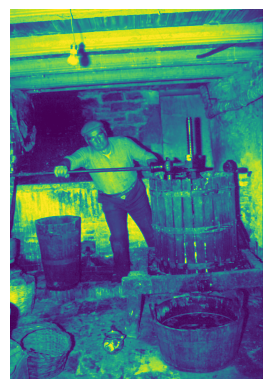

In [ ]:
img_path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Percorso dell'immagine
img_path = '/content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/197.JPG'

# Caricare e visualizzare l'immagine
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Nascondere gli assi
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

# Caricare il modello VGG16 pre-addestrato su ImageNet
model = VGG16(weights='imagenet')

# Funzione per caricare e pre-processare un'immagine
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Funzione per classificare l'immagine
def classify_image(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    preds = model.predict(img_array)
    decoded_preds = decode_predictions(preds, top=3)[0]
    return decoded_preds

553467096/553467096 [==============================] - 8s 0us/step


- Vgg16 - modello di rete
- Imagenet - dataset per addestramento
- Test - dataset-civiltà-contadina

In [ ]:
import os
import shutil
import random

# Directory delle immagini di test
test_images_dir = '/content/drive//MyDrive/dataset-civiltà-contadina/CivContadina_serie1'
person_dir = '/content/drive//MyDrive/dataset-civiltà-contadina/person'
object_dir = '/content/drive//MyDrive/dataset-civiltà-contadina/object'

# Creare le cartelle se non esistono- Eseguire solo la prima volata!!!
#os.makedirs(person_dir, exist_ok=True)
#os.makedirs(object_dir, exist_ok=True)

def is_person(predictions):
    for pred in predictions:
        if 'person' in pred[1]:
            return True
    return False

def classify_and_move_image(img_path, model, person_dir, object_dir):
    predictions = classify_image(img_path, model)
    if is_person(predictions):
        shutil.move(img_path, os.path.join(person_dir, os.path.basename(img_path)))
        return 'Person'
    else:
        shutil.move(img_path, os.path.join(object_dir, os.path.basename(img_path)))
        return 'Object'

# Prendere alcune immagini a caso e classificarle
sample_images = random.sample(os.listdir(test_images_dir), 5)
for img in sample_images:
    img_path = os.path.join(test_images_dir, img)
    result = classify_and_move_image(img_path, model, person_dir, object_dir)
    print(f'L\'immagine {img} è stata classificata come {result}.')



35363/35363 [==============================] - 0s 0us/step
L'immagine _Anteprima.jpg è stata classificata come Object.
1/1 [==============================] - 1s 568ms/step
L'immagine 55.JPG è stata classificata come Object.
1/1 [==============================] - 1s 532ms/step
L'immagine 57.JPG è stata classificata come Object.
1/1 [==============================] - 1s 545ms/step
L'immagine 63.JPG è stata classificata come Object.
1/1 [==============================] - 1s 943ms/step
L'immagine 85.JPG è stata classificata come Object.


In [ ]:
# Esempio di utilizzo-Viene illustrato la classe di appartenenza dell'oggetto dell'immagine
img_path = '/content/drive//MyDrive/dataset-civiltà-contadina/CivContadina_serie2/197.JPG'
# Funzione per classificare l'immagine

def classify_image(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    preds = model.predict(img_array)
    decoded_preds = decode_predictions(preds, top=3)[0]
    return decoded_preds

predictions = classify_image(img_path, model)
for pred in predictions:
    print(f"{pred[1]}: {pred[2]*100:.2f}%")

1/1 [==============================] - 1s 877ms/step
potter's_wheel: 35.11%
caldron: 20.80%
bucket: 9.33%


Risultati pessimi , classifica tutti come oggetti , alcune , predizione degli oggetti invece sono buone , come hay, thath o potter's wheel

1/1 [==============================] - 1s 930ms/step


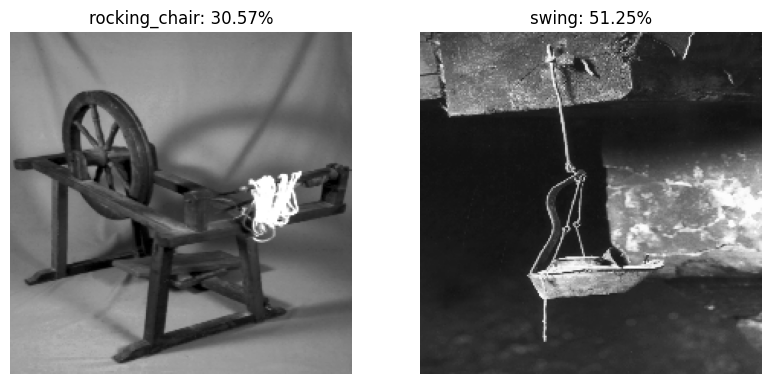

In [ ]:
import os
import random


image_files = os.listdir(test_images_dir)
if len(image_files) == 0:
    raise ValueError(f"The directory {test_images_dir} is empty.")

# Prendo alcune immagini a caso (select random images)
sample_images = random.sample(image_files, min(5, len(image_files)))

# Funzione per visualizzare immagini
def display_predictions(image_paths, model):
    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(image_paths):
        full_img_path = os.path.join(test_images_dir, img_path)
        predictions = classify_image(full_img_path, model)

        plt.subplot(2, 3, i+1)
        img = image.load_img(full_img_path, target_size=(224, 224))
        plt.imshow(img)
        plt.title(f"{predictions[0][1]}: {predictions[0][2]*100:.2f}%")
        plt.axis('off')

    plt.show()

display_predictions(sample_images, model)